# Classification Example

In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [5]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5009 - accuracy: 0.7866 - val_loss: 0.4124 - val_accuracy: 0.8321
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2992 - accuracy: 0.9041 - val_loss: 0.3118 - val_accuracy: 0.8804
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2178 - accuracy: 0.9294 - val_loss: 0.2800 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1722 - accuracy: 0.9447 - val_loss: 0.2773 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1404 - accuracy: 0.9549 - val_loss: 0.2823 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1176 - accuracy: 0.9631 - val_loss: 0.2925 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0940 - accuracy: 0.9733 - val_loss: 0.3373 - val_accuracy: 0.8784
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
import matplotlib.pyplot as plt

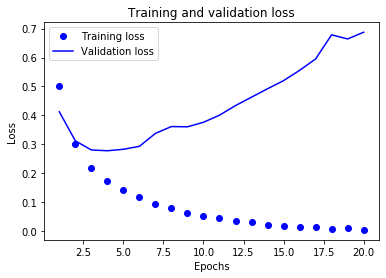

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

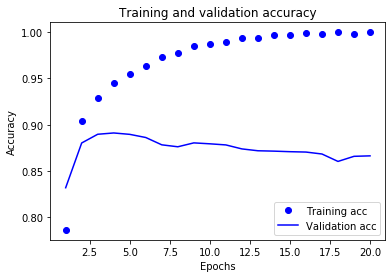

In [17]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 7ms/step - loss: 0.4537 - accuracy: 0.8154
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2583 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1980 - accuracy: 0.9297
Epoch 4/4
782/782 [==============================] - 1s 706us/step - loss: 0.2939 - accuracy: 0.8839


In [19]:
results

[0.29391244053840637, 0.8838800191879272]

In [20]:
model.predict(x_test)

array([[0.22689465],
       [0.9995979 ],
       [0.8979387 ],
       ...,
       [0.1201303 ],
       [0.12060648],
       [0.78031623]], dtype=float32)

# Clustering Example

In [21]:
from konlpy.tag import Hannanum
from pprint import pprint
import nltk

In [26]:
### 한글 bag-of-words 만들어보자
from konlpy.tag import Twitter
import pandas as pd

## 연합뉴스 로딩

kor_corpus = pd.read_csv('./\\news_koreanwave.csv', encoding='utf-8')

In [28]:
kor_corpus.head()

,time,title,contents
0,2016/08/09 16:44,에스테틱 미용 시장 개척하는 광주 노아 메디컬,(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...
1,2016/08/09 15:37,청소년 노래·춤 경연 'LG드림페스티벌'…총상금 5천만원,(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...
2,2016/08/09 15:32,"고신대병원, 카자흐스탄에 두 번째 거점센터",(부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...
3,2016/08/09 15:19,국제패션문화페스티벌 자원봉사자 모집,(대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...
4,2016/08/09 14:42,"""中한류 일정 대부분 정상 진행…좋은 콘텐츠로 다가가야""",(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...


In [27]:
len(kor_corpus)

2590

In [29]:
## Twitter 형태소 분석기를 이용한 뉴스기사 정제
pos_tagger = Twitter()

# 한글 문서 명사만 뽑아서 tf-idf
stopword = ['것','수','저']
total_news = []
for news in kor_corpus['contents'].head():
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

C:\Users\Woojin\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
kor_vectorizer = CountVectorizer(min_df=1) # 등장하는 단어들에 대한 오브젝트
kor_bow = kor_vectorizer.fit_transform(total_news) # 딕셔너리에 실제 단어들을 입력

In [32]:
print(kor_bow)

  (0, 31)	4
  (0, 207)	1
  (0, 202)	1
  (0, 56)	1
  (0, 64)	1
  (0, 337)	1
  (0, 108)	2
  (0, 136)	3
  (0, 199)	6
  (0, 179)	5
  (0, 6)	1
  (0, 283)	4
  (0, 198)	3
  (0, 71)	1
  (0, 69)	3
  (0, 157)	1
  (0, 55)	1
  (0, 352)	3
  (0, 50)	2
  (0, 8)	1
  (0, 180)	1
  (0, 272)	1
  (0, 127)	2
  (0, 304)	1
  (0, 145)	1
  :	:
  (4, 261)	1
  (4, 32)	1
  (4, 181)	1
  (4, 40)	1
  (4, 197)	1
  (4, 285)	1
  (4, 205)	2
  (4, 195)	2
  (4, 137)	1
  (4, 47)	1
  (4, 248)	1
  (4, 250)	1
  (4, 273)	1
  (4, 78)	1
  (4, 309)	1
  (4, 267)	1
  (4, 62)	1
  (4, 310)	1
  (4, 17)	1
  (4, 88)	1
  (4, 24)	1
  (4, 260)	1
  (4, 109)	1
  (4, 80)	1
  (4, 354)	1


In [33]:
print(kor_vectorizer.get_feature_names())
# bag-of-words
print(kor_bow.shape)
print(kor_bow.toarray())

['가수', '가요', '각각', '강조', '개발', '개정', '개척', '거점', '건강', '검진', '견실', '견지해', '결정', '경북', '경연', '경우', '경운대', '경쟁', '경제', '경향', '계획', '고고', '고신대', '공간', '공공', '공연장', '공유', '과거', '관계자', '관련', '광부', '광주', '교류', '교육', '교육감', '구미', '구미시장', '구축', '국내', '국립병원', '국민', '국악', '국제', '권정열', '규모', '그룹', '극장', '극히', '근무', '금은', '기기', '기능', '기도', '기사', '기술', '기업', '기자', '기존', '기타', '기획', '김영만', '김태우', '끼리', '나라', '날로', '내년', '내달', '내용', '노래', '노아', '누구', '눈길', '다음', '다이어트', '단일', '담당', '당일', '대구', '대부분', '대상', '대중', '대표', '대학', '대한', '대해', '댄스', '더욱', '도시', '도움', '도지사', '독소', '동상', '드림', '등록', '디자이너', '디자인', '라며', '리밍', '린다', '마련', '메시지', '모집', '몽골', '문의', '문화', '물리', '미래', '미사일', '미용', '민간', '민정', '박대', '박순', '박창수', '반복', '반응', '발굴', '발급', '발생', '발전', '방어', '배너', '배치', '번역', '베트남', '병원', '보도', '보유', '복부', '복음병원', '본문', '본선', '봉사', '부문', '부분', '부산', '분야', '분위기', '분해', '브랜드', '브리핑', '사드', '사립', '사무국', '사업', '사용', '사흘', '산업', '상의', '상표', '생각', '생산', '서로', '서울', '선도', '선발', '선정', '설립', '설명', '성공', '성분', '성인

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(kor_bow.toarray())

In [35]:
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.06347707, 0.        ,
        0.06347707],
       [0.07951321, 0.15902641, 0.06415076, ..., 0.        , 0.07951321,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05029333, ..., 0.        , 0.        ,
        0.        ]])

In [37]:
yonhap = kor_corpus['contents']

In [38]:
import re

total_news = []
stopword = ['것','수','저']

for news in yonhap[:1000]:
    pos_news = re.sub('.* 기자 = ', '', news) # 한 기자가 많은 기사를 작성. 기자명 때문에 유사한 것으로 계산될 수 있으니 이를 제거하자
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(pos_news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [39]:
kor_vectorizer = CountVectorizer(min_df=10)
kor_bow = kor_vectorizer.fit_transform(total_news)

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
cosine_similarity(kor_bow[0], kor_bow)

array([[1.        , 0.12173486, 0.06030633, 0.06818622, 0.16158773,
        0.10640966, 0.0758098 , 0.16440813, 0.04298012, 0.10527936,
        0.11098767, 0.08508637, 0.05065256, 0.10504686, 0.05860255,
        0.10252877, 0.13108813, 0.20904061, 0.18142591, 0.06008639,
        0.08061022, 0.4265352 , 0.12486552, 0.08023511, 0.0764091 ,
        0.0953109 , 0.06859413, 0.11930941, 0.08662264, 0.11129395,
        0.06113981, 0.12393213, 0.04990412, 0.05792563, 0.06057372,
        0.0796005 , 0.08456161, 0.14001477, 0.05835841, 0.07177136,
        0.14522525, 0.04548588, 0.09271934, 0.11080271, 0.09701017,
        0.18128431, 0.11371471, 0.12113809, 0.09403049, 0.10787924,
        0.07498126, 0.09475421, 0.12143068, 0.13243743, 0.08161283,
        0.11089333, 0.06384337, 0.20147507, 0.09319733, 0.07407103,
        0.09649767, 0.12467216, 0.1044966 , 0.07657052, 0.08213785,
        0.11760737, 0.09903127, 0.14698795, 0.13397784, 0.28123236,
        0.10296484, 0.27624495, 0.05792305, 0.10

In [42]:
(-cosine_similarity(kor_bow[0], kor_bow)).argsort()

array([[  0,  21, 604, 503, 883, 440, 498, 196, 723, 172, 416, 552, 685,
        877, 393, 740, 895, 264, 309,  69,  71, 417, 463, 770, 222, 287,
        369, 272, 487, 594, 271, 680, 737, 733,  97,  91, 671, 917, 232,
        800, 267, 587, 187, 349, 806, 712, 628, 261, 506, 553, 497, 363,
        665, 305, 891, 753, 427, 768, 964, 525, 471, 280, 933, 386, 676,
        850, 160, 765, 283, 682, 675, 849, 785, 228, 230, 154, 970,  17,
        747, 268, 161, 203, 642, 243, 554, 629, 906,  57, 724, 551, 643,
        491, 926, 492, 661, 184, 511, 759, 713, 958, 320, 882, 946, 382,
        687, 876, 202, 447, 752, 931, 560, 496, 389, 957, 255, 201, 634,
        360, 457, 567, 677, 558, 273, 218, 719, 973,  18,  45, 379, 582,
        708, 175, 584, 871, 532, 585, 887, 617, 916, 911, 913, 355, 938,
        354, 475, 215, 951, 306, 269, 907, 147, 784, 177, 884, 489, 181,
        779, 136, 997, 129, 144,   7, 343, 352, 975,  85, 337,   4, 823,
         99, 460, 683, 242, 104, 490, 426, 189, 376

In [43]:
idx = (-cosine_similarity(kor_bow[0], kor_bow)[0]).argsort()
print(idx)

[  0  21 604 503 883 440 498 196 723 172 416 552 685 877 393 740 895 264
 309  69  71 417 463 770 222 287 369 272 487 594 271 680 737 733  97  91
 671 917 232 800 267 587 187 349 806 712 628 261 506 553 497 363 665 305
 891 753 427 768 964 525 471 280 933 386 676 850 160 765 283 682 675 849
 785 228 230 154 970  17 747 268 161 203 642 243 554 629 906  57 724 551
 643 491 926 492 661 184 511 759 713 958 320 882 946 382 687 876 202 447
 752 931 560 496 389 957 255 201 634 360 457 567 677 558 273 218 719 973
  18  45 379 582 708 175 584 871 532 585 887 617 916 911 913 355 938 354
 475 215 951 306 269 907 147 784 177 884 489 181 779 136 997 129 144   7
 343 352 975  85 337   4 823  99 460 683 242 104 490 426 189 376 974 405
 388 515 942 641 912 378 778 472 788 274 128 493 346 890 944 149 152 356
 864 624 536 134 648 289 873 420 290  67 994 780 178 336 889  40 614 234
 365 572 711 456 739 561 763 610 530 302 125 270 736 291 971 573  37 881
 259 213 844 399 959 481 444 904 167 987 742 855  8

In [47]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

In [48]:
def find_most_similar_news_idf(index, tfidf, corpus):
    idx = (-cosine_similarity(tfidf[index], tfidf)[0]).argsort()[1]
    return corpus[idx]

In [49]:
yonhap[idx]

'(서울=연합뉴스) 곽명일 기자 = 북한당국이 주민을 상대로 자본주의 문화에 대한 단속과 통제를 강화하고 있지만, \'태양의 후예\'와 같은 한국 드라마를 몰래 시청하는 북한 주민들이 많다고 북한 전문매체인 데일리NK가 4일 보도했다. 평안남도 소식통은 이 매체에 "최근 젊은 청년들 속에서 \'태양의 후예\'라는 한국 드라마가 인기를 끌면서 날이 새는 줄도 모르고 시청하고 있다"면서 "이 드라마에 대한 소문이 퍼지자 어른·아이 할 것 없이 너도나도 (드라마를) 보기 위해 애쓰고 있는 상황"이라고 전했다. 소식통은 이어 "시장에서 상인들에게 다가가 \'아랫동네\'(한국)것이 없느냐\'고 슬쩍 말을 건네면 대뜸 \'태양의 후예\'를 소개한다"며 "새 드라마 원본(CD)은 5만 원(한국 돈 7천 원)에 판매되고, 복사본은 그 절반 값에 거래된다"고 설명했다. 전체기사 본문배너 그러면서 "(주민들은)\'200일 전투\'의 쌓인 피로를 한국 드라마를 시청하거나 가요를 감상하면서 해소한다"며 "한류의 확산으로 볼거리가 없는 조선중앙TV를 외면하는 주민이 늘어나고 있다"고 덧붙였다. 앞서 이 매체는 북한당국이 중국산 노트텔(EVD 플레이어)을 남한 드라마 시청의 주요 수단으로 지목하면서 수입을 전면 금지하는 지시를 내렸다고 지난달 23일 보도한 바 있다.'

In [50]:
find_most_similar_news_idf(idx, tfidf, yonhap)

'(하노이=연합뉴스) 김문성 특파원 = 배정호 민주평화통일자문회의 사무처장은 27일 "북한의 전통적인 우방국이자 여전히 정치, 경제, 군사적 교류를 이어가는 베트남의 대북제재 이행은 북한의 태도변화에 큰 전환점이 될 수 있다"며 베트남의 적극적인 제재 동참을 촉구했다. 배 사무처장은 이날 베트남 하노이 롯데호텔에서 민주평통 주최로 열린 \'2016 한·베트남 평화통일포럼\'에서 기조연설을 통해 "유엔 제재가 빈틈없이 이행되도록 한국과 베트남이 적극적으로 협력하는 것이 무엇보다 필요하다"고 강조했다. 그는 "2014년 북한과 베트남이 500만 달러(57억 원)의 투자와 교역을 진행했고 베트남에 북한 식당도 운영되고 있다"며 북한의 돈줄을 죄고 비핵화를 이루는데 베트남의 협력을 요청했다. 전체기사 본문배너 강동완 동아대 교수는 \'한류가 북한사회에 미치는 영향\'이란 주제 발표에서 "최근 북한 내부에서 남한 영화나 드라마가 인기를 누리면서 한류 현상이 확산하고 있다"며 "이는 단순히 한류 전파라는 점 이외에 폐쇄된 북한 체제에 자본주의 요소인 시장을 확대하는 매개체"라고 평가했다. 강 교수는 "시장이 단순히 물물거래의 기능보다는 정보가 유통되고 북한사회의 폐쇄성을 상쇄하는 기능을 지니게 됐다"며 "남한 영상 매체의 확산은 북한에서 지역·계층 간 경계 허물기라는 사회적 현상의 변화를 초래하고 있다"고 말했다. 강 교수는 북한 주민의 남한 영상 매체 시청이 북한 체제 변화를 촉구하는 다른 요인과 상호 결합할 경우 북한사회 전체를 움직일 수 있을 기폭제가 될 것으로 전망했다. 딘 꽝 하이 베트남 역사연구소장은 베트남이 1975년 남북통일 이후 중앙에서 지방까지 집중적이고 일관된 정치, 문화, 사회, 경제 통합을 추진했다고 소개하며 전쟁 상흔 치료, 민족 화합과 화해, 미래를 위해 승자와 패자라는 이분법식 인식과 과거 상처에 얽매여서는 안 된다고 지적했다.'

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=5, n_init=50, verbose=1)

In [53]:
kmeans.fit(tfidf)

Initialization complete
Iteration  0, inertia 1719.597
Iteration  1, inertia 925.856
Iteration  2, inertia 918.108
Iteration  3, inertia 914.290
Iteration  4, inertia 912.025
Iteration  5, inertia 910.728
Iteration  6, inertia 910.176
Iteration  7, inertia 910.046
Iteration  8, inertia 909.981
Iteration  9, inertia 909.967
Iteration 10, inertia 909.961
Iteration 11, inertia 909.954
Converged at iteration 11: center shift 0.000000e+00 within tolerance 3.860618e-08
Initialization complete
Iteration  0, inertia 1769.657
Iteration  1, inertia 925.539
Iteration  2, inertia 921.387
Iteration  3, inertia 919.543
Iteration  4, inertia 918.293
Iteration  5, inertia 917.504
Iteration  6, inertia 917.008
Iteration  7, inertia 915.931
Iteration  8, inertia 914.552
Iteration  9, inertia 913.732
Iteration 10, inertia 913.370
Iteration 11, inertia 913.022
Iteration 12, inertia 912.720
Iteration 13, inertia 912.246
Iteration 14, inertia 911.288
Iteration 15, inertia 910.561
Iteration 16, inertia 910.1

Iteration 18, inertia 912.399
Iteration 19, inertia 912.199
Iteration 20, inertia 911.999
Iteration 21, inertia 911.921
Iteration 22, inertia 911.870
Iteration 23, inertia 911.839
Converged at iteration 23: center shift 0.000000e+00 within tolerance 3.860618e-08
Initialization complete
Iteration  0, inertia 1758.149
Iteration  1, inertia 920.528
Iteration  2, inertia 914.009
Iteration  3, inertia 910.674
Iteration  4, inertia 908.342
Iteration  5, inertia 906.989
Iteration  6, inertia 906.673
Iteration  7, inertia 906.571
Iteration  8, inertia 906.546
Converged at iteration 8: center shift 0.000000e+00 within tolerance 3.860618e-08
Initialization complete
Iteration  0, inertia 1741.138
Iteration  1, inertia 923.255
Iteration  2, inertia 917.721
Iteration  3, inertia 913.204
Iteration  4, inertia 909.484
Iteration  5, inertia 907.491
Iteration  6, inertia 906.653
Iteration  7, inertia 906.371
Iteration  8, inertia 906.164
Iteration  9, inertia 906.015
Iteration 10, inertia 905.997
Conve

Iteration 19, inertia 908.134
Iteration 20, inertia 907.819
Iteration 21, inertia 907.636
Iteration 22, inertia 907.542
Iteration 23, inertia 907.498
Iteration 24, inertia 907.490
Converged at iteration 24: center shift 0.000000e+00 within tolerance 3.860618e-08
Initialization complete
Iteration  0, inertia 1768.658
Iteration  1, inertia 925.901
Iteration  2, inertia 920.150
Iteration  3, inertia 917.252
Iteration  4, inertia 914.842
Iteration  5, inertia 913.410
Iteration  6, inertia 912.598
Iteration  7, inertia 912.085
Iteration  8, inertia 911.796
Iteration  9, inertia 911.455
Iteration 10, inertia 910.725
Iteration 11, inertia 910.392
Iteration 12, inertia 910.279
Iteration 13, inertia 910.193
Iteration 14, inertia 910.174
Converged at iteration 14: center shift 0.000000e+00 within tolerance 3.860618e-08
Initialization complete
Iteration  0, inertia 1752.663
Iteration  1, inertia 924.075
Iteration  2, inertia 917.683
Iteration  3, inertia 915.387
Iteration  4, inertia 914.480
Iter

Iteration  7, inertia 915.905
Iteration  8, inertia 915.274
Iteration  9, inertia 914.835
Iteration 10, inertia 914.567
Iteration 11, inertia 914.391
Iteration 12, inertia 914.283
Iteration 13, inertia 914.197
Iteration 14, inertia 914.168
Converged at iteration 14: center shift 0.000000e+00 within tolerance 3.860618e-08
Initialization complete
Iteration  0, inertia 1753.258
Iteration  1, inertia 919.006
Iteration  2, inertia 912.415
Iteration  3, inertia 909.898
Iteration  4, inertia 908.910
Iteration  5, inertia 908.685
Iteration  6, inertia 908.592
Iteration  7, inertia 908.475
Iteration  8, inertia 908.452
Iteration  9, inertia 908.434
Iteration 10, inertia 908.413
Iteration 11, inertia 908.393
Iteration 12, inertia 908.363
Iteration 13, inertia 908.344
Converged at iteration 13: center shift 0.000000e+00 within tolerance 3.860618e-08
Initialization complete
Iteration  0, inertia 1779.327
Iteration  1, inertia 922.722
Iteration  2, inertia 915.833
Iteration  3, inertia 913.070
Iter

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [54]:
kmeans.labels_

array([0, 1, 1, 1, 4, 4, 4, 0, 1, 3, 4, 1, 1, 4, 1, 4, 1, 1, 0, 3, 1, 0,
       1, 4, 4, 4, 4, 4, 4, 0, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 0, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 1, 1, 4,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 3, 1, 1, 4, 1,
       4, 4, 1, 0, 1, 1, 0, 3, 1, 0, 1, 4, 1, 4, 0, 3, 4, 0, 1, 1, 4, 1,
       0, 0, 4, 3, 4, 0, 4, 4, 1, 4, 1, 3, 1, 1, 3, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 3, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 1, 3, 1, 3, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 0, 1, 3, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 3, 3, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1,
       1, 3, 0, 3, 3, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 3, 4, 3, 1, 3, 1,
       0, 4, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3,

In [55]:
import numpy as np
clusters = []
for i in range(0, kmeans.n_clusters):
    clusters.append(np.where(kmeans.labels_ == i))

In [56]:
clusters

[(array([  0,   7,  18,  21,  29,  46,  59,  61,  71,  91,  94,  97, 102,
         105, 110, 111, 115, 125, 127, 140, 144, 152, 153, 160, 163, 171,
         172, 177, 187, 189, 192, 196, 198, 201, 202, 203, 208, 211, 213,
         215, 222, 226, 227, 228, 230, 232, 234, 242, 257, 264, 268, 269,
         271, 272, 283, 288, 289, 302, 309, 326, 330, 331, 337, 343, 346,
         349, 352, 354, 355, 356, 363, 369, 384, 389, 392, 393, 399, 416,
         417, 426, 427, 440, 441, 444, 447, 456, 460, 463, 471, 481, 482,
         487, 488, 489, 490, 491, 492, 497, 498, 503, 506, 515, 520, 525,
         527, 529, 530, 532, 533, 549, 550, 551, 552, 553, 560, 561, 584,
         587, 594, 604, 608, 617, 628, 634, 641, 643, 648, 664, 667, 671,
         677, 680, 683, 685, 687, 691, 711, 712, 713, 719, 720, 723, 725,
         730, 731, 733, 736, 737, 738, 739, 740, 747, 753, 759, 760, 765,
         766, 768, 769, 773, 784, 785, 788, 798, 799, 800, 801, 805, 806,
         807, 812, 819, 822, 823, 826,

In [57]:
print('1번 클러스터')
print(yonhap[8])
print(yonhap[9])
print(yonhap[19])

1번 클러스터
(서울=연합뉴스) 윤고은 기자 = 한류스타 장근석의 팬클럽이 지난 6~7일 '장근석 생일 기념 나눔 사진전'을 열어 수익금 5천여만 원을 모았다고 홍보사 와이트리컴퍼니가 9일 밝혔다. 수익금은 전액 기부할 예정이다. 장근석의 공식 팬클럽 크리제이가 서울 강남구 청담동의 갤러리에서 개최한 이번 사진전에는 이틀간 1천500여 명이 다녀갔다. 크리제이가 4년째 개최하는 장근석 사진전은 팬들이 찍은 장근석의 사진을 비롯해 각종 팬아트 등으로 꾸며졌다. 전체기사 본문배너 홍보사는 "기록적인 폭염이 맹위를 떨친 날씨였음에도 나눔을 함께 하기 위해 모인 팬들이 질서 정연하게 사진전을 관람하며 성숙한 팬 문화를 선보였다"고 전했다. 이어 "각국에서 모인 기부금과 입장료로 모인 5천여만 원은 전액 어려운 이웃을 위해 쓰일 예정"이라고 밝혔다. 전시회에 참석해 팬들과 조촐하게 생일파티를 가진 장근석은 "지난 1년 동안의 활동과 그때의 기억을 떠올려보게 된 뜻깊은 시간이었다"고 말했다. 한편, 장근석은 오는 18일 시작하는 tvN 예능 '내 귀에 캔디'에 출연한다. 
(서울=연합뉴스) 윤고은 기자 = 한류스타 이광수가 패션 브랜드 버커루의 광고모델로 발탁됐다고 소속사 킹콩엔터테인먼트가 9일 밝혔다. 버커루 측은 "아시아 전역에서 인기 있는 이광수가 버커루와 긍정적인 효과를 끌어낼 수 있을 것이라 여겼다"고 설명했다. 이어 "앞으로 이광수와 함께하는 다양한 프로모션으로 소비자들과 만날 예정"이라고 덧붙였다. 전체기사 본문배너 이광수는 KBS 2TV '마음의 소리'와 tvN '안투라지' 방송을 앞두고 있다.
(서울=연합뉴스) 정아란 기자 = 한류스타 박해진(33)이 데뷔 10년 만에 처음 만들어지는 공식 팬클럽 창단식을 사비로 진행할 계획이다. 소속사 마운틴 무브먼트는 8일 "박해진이 팬들을 사랑하는 마음에서 2천여 명이 참석하는 공식 팬클럽 '클럽진스'(CLUB Jin's) 창단식 비용 전액을 자신이 부담하기로 했다"고 알렸다. 박해진은 지난 4월 데뷔 10주년 기념